<a href="https://colab.research.google.com/github/Daayum03/Jupyter-Notebook/blob/Data-Analysis-with-Python/Laptop_Pricing_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'laptop-price-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3057690%2F5254982%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240703%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240703T195230Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D804cc4dec8cbcf6ab086a063f2069f04c0ccf7b358523fe662514a42f13e84864e78effb275b5812ff79cfaff995ad02f4014b5b45d6f1ca26e13e91cbc2907339415b7478345339c5c4a4a80d341e35c3df92dfe18483251bbc88b4c53f14e7c23f15b8cfe5fde34119fd96dcd93cbc750389dacb5355bdeba29cd75ca0e86830d48a73f1ce6abbccb53eedee8cda1fb7a9480b79f440e12fecd6ec9efeed68b9931a5ea5365c3ca829487671f17825cf8331c115093c83a5a7acda43b5bbbc04f04041b125fd16a3f46915437a798caac03df082c0e1104efbe7bdf52441a048bd47dca11b09249ad488559e5cd52d6c88c4e99c5e21a29cb2dda5eb4274c3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
#Math and Vectors
import pandas as pd
import numpy as np
import warnings
from scipy.stats import skew, kurtosis

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [ ]:
!pip install pycaret

ERROR: Could not find a version that satisfies the requirement pycaret (from versions: none)
ERROR: No matching distribution found for pycaret


In [ ]:
df_test = pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv', sep =',')
df= pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_train.csv",sep=',')

In [ ]:
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [ ]:
#What is the shape of the Data?
#Lets find the number of Rows and Columns present in the DataSet
print('The number of dimensions(rows,columns) of our dataset is{}'.format(df_test.shape))

The number of dimensions(rows,columns) of our dataset is(325, 13)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              325 non-null    object 
 1   Model Name                325 non-null    object 
 2   Category                  325 non-null    object 
 3   Screen Size               325 non-null    object 
 4   Screen                    325 non-null    object 
 5   CPU                       325 non-null    object 
 6   RAM                       325 non-null    object 
 7    Storage                  325 non-null    object 
 8   GPU                       325 non-null    object 
 9   Operating System          325 non-null    object 
 10  Operating System Version  291 non-null    object 
 11  Weight                    325 non-null    object 
 12  Price                     325 non-null    float64
dtypes: float64(1), object(12)
memory usage: 33.1+ KB


In [ ]:
#Find out how many missing values are there as a Percentage?

print('The number of missing values is: \n' + str(df_test.isnull().sum()) + "\n\n" + 'The number of missing values Percentage(%): \n' + str(df_test.isnull().sum()/len(df_test) *100))

The number of missing values is: 
Manufacturer                 0
Model Name                   0
Category                     0
Screen Size                  0
Screen                       0
CPU                          0
RAM                          0
 Storage                     0
GPU                          0
Operating System             0
Operating System Version    34
Weight                       0
Price                        0
dtype: int64

The number of missing values Percentage(%): 
Manufacturer                 0.000000
Model Name                   0.000000
Category                     0.000000
Screen Size                  0.000000
Screen                       0.000000
CPU                          0.000000
RAM                          0.000000
 Storage                     0.000000
GPU                          0.000000
Operating System             0.000000
Operating System Version    10.461538
Weight                       0.000000
Price                        0.000000
dtype: flo

<Axes: >

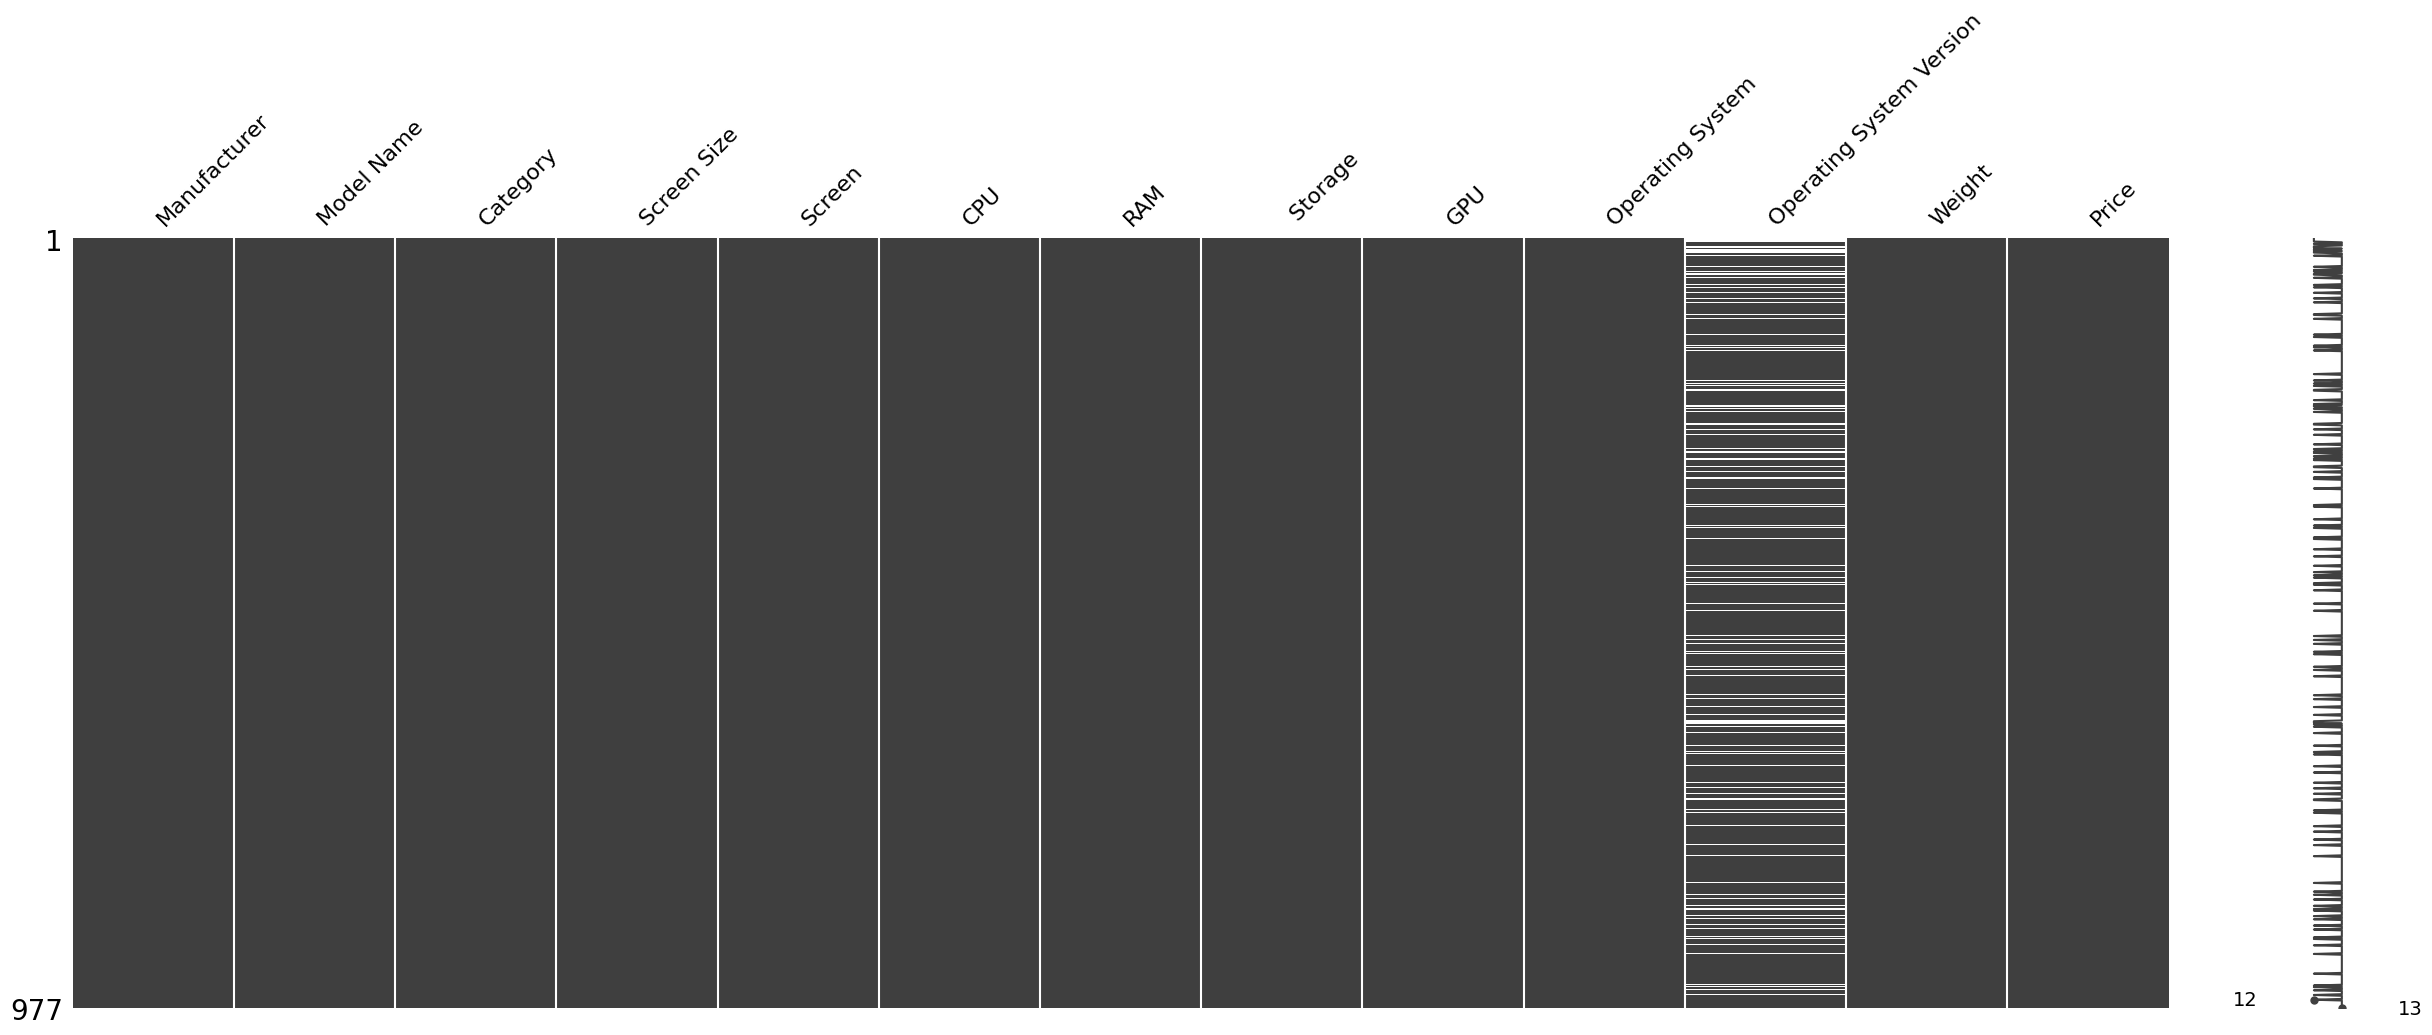

In [ ]:
#Valuing null values
msno.matrix(df, figsize= (30,10))

In [ ]:
df_test.describe()

,Price
count,3.250000e+02
mean,9.891671e+06
std,5.943217e+06
min,1.547208e+06
25%,5.317416e+06
50%,8.892000e+06
75%,1.332022e+07
max,3.534570e+07


In [ ]:
#Record t#The the number of duplicate values
#What is #The percentage of duplicate values
#Work with df data here!
print('The number of duplicate values is: \n' + str(df_test.duplicated().sum()))

print('The number of duplicate values as a Percentage (%): \n'+  str(df_test.duplicated().sum() / len(df_test) *100))

The number of duplicate values is: 
28
The number of duplicate values as a Percentage (%): 
8.615384615384615


In [ ]:
#changing variables' letters from uppercase to lowercase letters
train = df_test.rename(columns= str.lower)
test = df.rename(columns = str.lower)
train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [ ]:
def compare_means(df,discrete_col,continuous_col):
    group = df.groupby([discrete_col],as_index=False)[continuous_col].mean().reset_index(drop=True)
    plt.figure(figsize=(10,5))
    sns.barplot(x=group[discrete_col],y=group[continuous_col],palette='Reds')
    plt.ylabel('mean ' + continuous_col)
    plt.show()

<Axes: xlabel='price', ylabel='Density'>

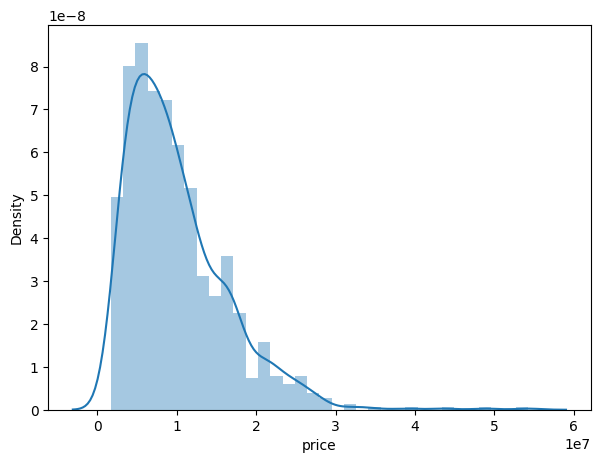

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(test["price"])

In [ ]:
#Now Calculate the Fisher-Pearson correlation of Skewness
print(skew(test["price"]))

1.6246441522246184


In [ ]:
print(kurtosis(test["price"]))


5.00517224490561


In [ ]:
test["price"].describe()

count    9.770000e+02
mean     1.001899e+07
std      6.306430e+06
min      1.706375e+06
25%      5.326308e+06
50%      8.527428e+06
75%      1.311570e+07
max      5.423231e+07
Name: price, dtype: float64

In [ ]:
test['manufacturer'].head()

0    Apple
1    Apple
2       HP
3    Apple
4    Apple
Name: manufacturer, dtype: object

In [ ]:
test['manufacturer'].value_counts()

manufacturer
Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: count, dtype: int64

In [ ]:
test['manufacturer'].describe()

count      977
unique      19
top       Dell
freq       232
Name: manufacturer, dtype: object

In [ ]:
test['manufacturer'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Let's have a look at the different manufacturers:


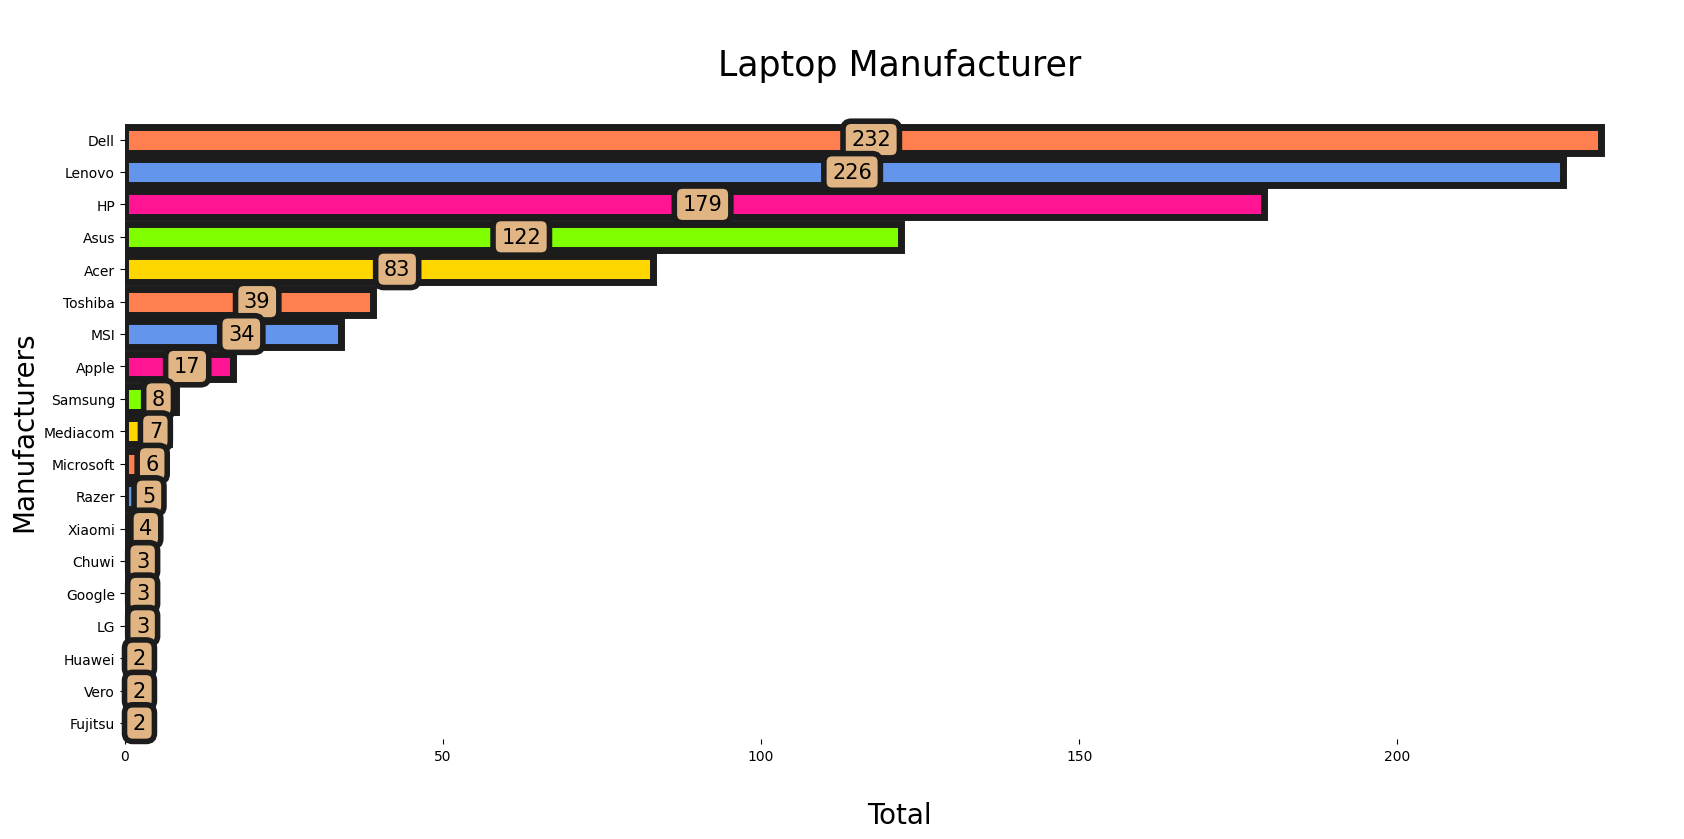

In [ ]:
print("Let's have a look at the different manufacturers:")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=test["manufacturer"],order=test["manufacturer"].value_counts().index,palette=["#ff7f50", "#6495ed", "#ff1493", "#7fff00", "#ffd700"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nLaptop Manufacturer\n",fontsize=25)
p.axes.set_ylabel("Manufacturers",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look at the different manufacturers:


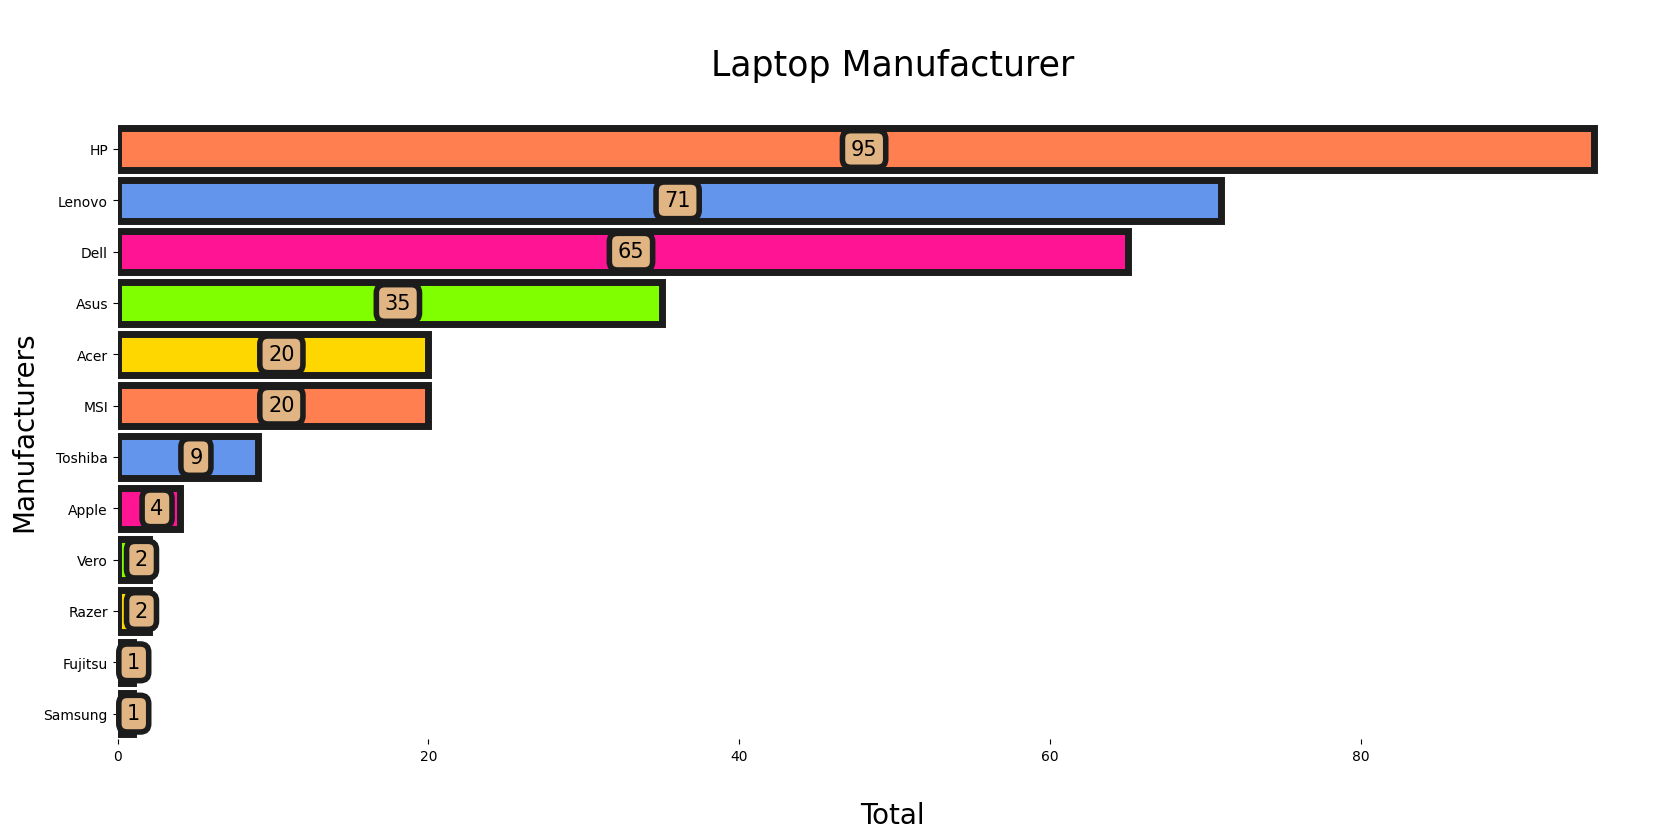

In [ ]:
print("Let's have a look at the different manufacturers:")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=train["manufacturer"],order=train["manufacturer"].value_counts().index,palette=["#ff7f50", "#6495ed", "#ff1493", "#7fff00", "#ffd700"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nLaptop Manufacturer\n",fontsize=25)
p.axes.set_ylabel("Manufacturers",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Conclusions:
1. The number of varaibles is 13, from this number 12 are object variables, and 1 numerical float variable
2. The number of Observations(sample size) is 977
3. There are 28 duplicate values in the dataset at percentage rate of 8.62%
4. The largest Manufacturer is DELL with 232 products produced
5. The Largest Laptop Manufacturer was found to be HP at 95 different samples, making up a pularity
6. The Fisher-Pearson Skewness test found a right skewness (>1) at 1.62
